In [20]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os

In [21]:
def upload_image():
    """Upload an image file to Colab"""
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename
    return None

In [22]:
#Upload your image
print("Please upload your image file:")
input_filename = upload_image()


if not input_filename:
    raise ValueError("No image file was uploaded")


Please upload your image file:


Saving Low_scene-bw.jpg to Low_scene-bw (1).jpg


In [23]:
# Read the image
img = cv2.imread(input_filename)
if img is None:
    raise ValueError("Could not read the image file")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

In [24]:
# Method 1: Simple RGB channel-wise equalization (not recommended)
def channel_wise_hist_eq(image):
    """Apply histogram equalization to each channel separately"""
    channels = cv2.split(image)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    return cv2.merge(eq_channels)

In [25]:
# Method 2: Convert to HSV and equalize only V channel (better)
def hsv_hist_eq(image):
    """Convert to HSV space and equalize only Value channel"""
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v_eq = cv2.equalizeHist(v)
    hsv_eq = cv2.merge([h, s, v_eq])
    return cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

In [26]:
# Method 3: CLAHE in LAB color space (best method)
def clahe_hist_eq(image):
    """Apply CLAHE to L-channel in LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l_eq = clahe.apply(l)

    lab_eq = cv2.merge([l_eq, a, b])
    return cv2.cvtColor(lab_eq, cv2.COLOR_LAB2RGB)

In [27]:
# Apply all methods
rgb_eq = channel_wise_hist_eq(img)
hsv_eq = hsv_hist_eq(img)
clahe_eq = clahe_hist_eq(img)

In [28]:
# Save all results
output_files = {
    'original.jpg': cv2.cvtColor(img, cv2.COLOR_RGB2BGR),
    'rgb_equalized.jpg': cv2.cvtColor(rgb_eq, cv2.COLOR_RGB2BGR),
    'hsv_equalized.jpg': cv2.cvtColor(hsv_eq, cv2.COLOR_RGB2BGR),
    'clahe_equalized.jpg': cv2.cvtColor(clahe_eq, cv2.COLOR_RGB2BGR)
}

for filename, image in output_files.items():
    cv2.imwrite(filename, image)

In [29]:
# Display results
plt.figure(figsize=(20, 12))


<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<ipython-input-30-b3cf13bc49bc>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


(0.0, 256.0)

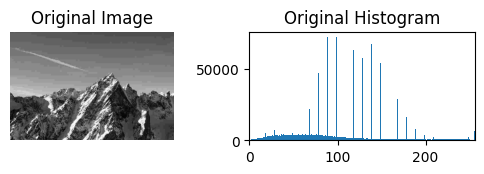

In [30]:
# Original Image
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.xlim([0, 256])

<ipython-input-31-ed8d28bffc98>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(rgb_eq.ravel(), 256, [0, 256])


(0.0, 256.0)

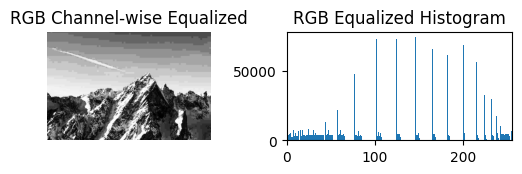

In [31]:
# RGB Equalized
plt.subplot(3, 2, 3)
plt.imshow(rgb_eq)
plt.title('RGB Channel-wise Equalized')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(rgb_eq.ravel(), 256, [0, 256])
plt.title('RGB Equalized Histogram')
plt.xlim([0, 256])

<ipython-input-32-0799b53f2db4>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(hsv_eq.ravel(), 256, [0, 256])


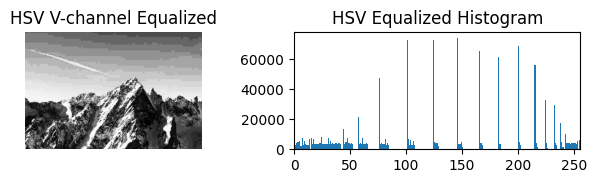

In [32]:
# HSV Equalized
plt.subplot(3, 2, 5)
plt.imshow(hsv_eq)
plt.title('HSV V-channel Equalized')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(hsv_eq.ravel(), 256, [0, 256])
plt.title('HSV Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

<ipython-input-33-782e7557d229>:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_eq.ravel(), 256, [0, 256])


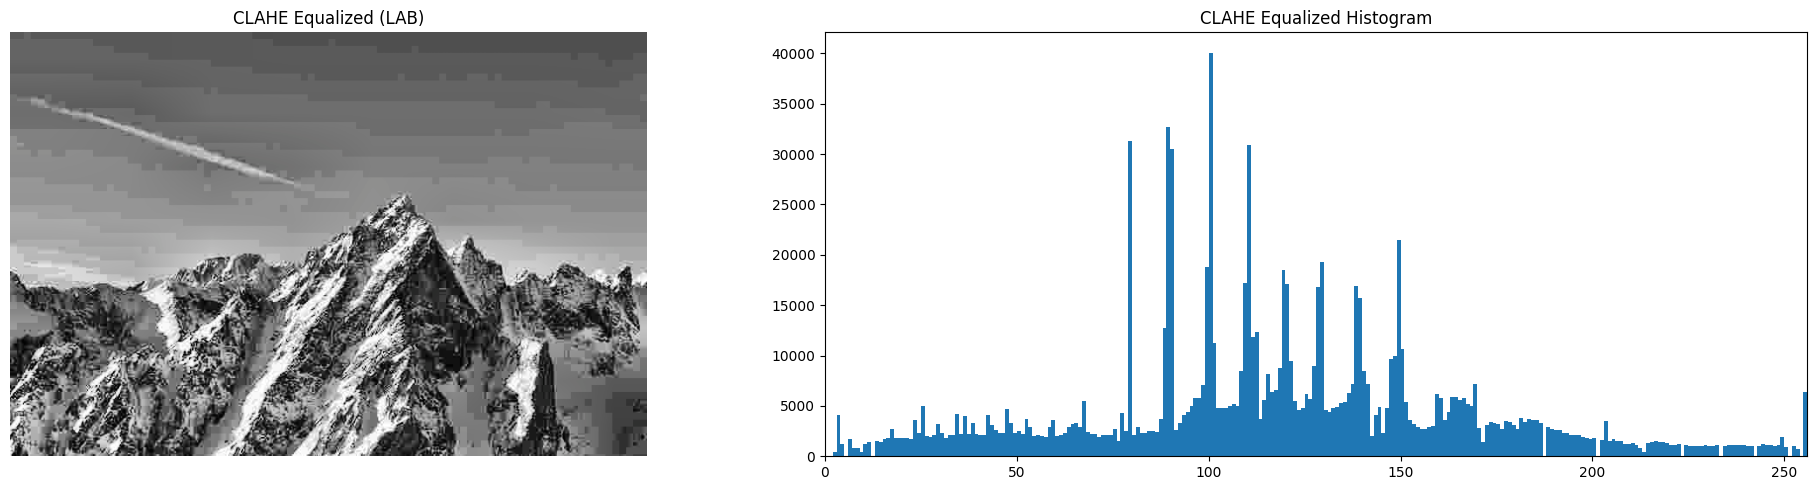

In [33]:
# CLAHE Equalized
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.imshow(clahe_eq)
plt.title('CLAHE Equalized (LAB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(clahe_eq.ravel(), 256, [0, 256])
plt.title('CLAHE Equalized Histogram')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


In [34]:
# Download the results
print("\nOutput files created:")
for filename in output_files.keys():
    print(f"- {filename}")

print("\nYou can download these files from the Colab file browser on the left")


Output files created:
- original.jpg
- rgb_equalized.jpg
- hsv_equalized.jpg
- clahe_equalized.jpg

You can download these files from the Colab file browser on the left


# Implementation from Scratch

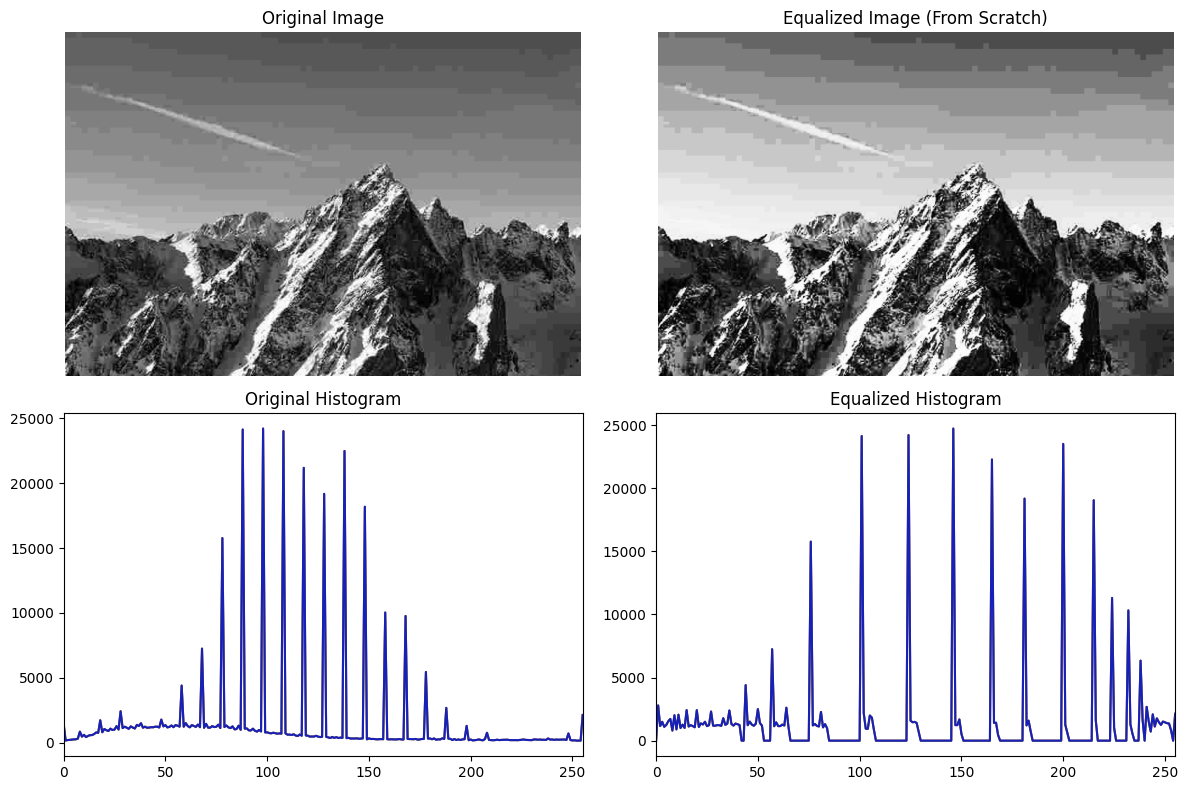

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Only used for image loading and display, not for the algorithm

def histogram_equalization_from_scratch(image):
    """
    Implement histogram equalization from scratch for grayscale images

    Parameters:
    -----------
    image : numpy.ndarray
        Input grayscale image (values from 0-255)

    Returns:
    --------
    numpy.ndarray
        Histogram equalized image
    """
    # Ensure the image is grayscale
    if len(image.shape) > 2:
        print("Converting color image to grayscale...")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get image dimensions
    height, width = image.shape
    total_pixels = height * width

    # Step 1: Calculate histogram
    histogram = np.zeros(256, dtype=int)
    for y in range(height):
        for x in range(width):
            histogram[image[y, x]] += 1

    # Step 2: Calculate cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=float)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    # Normalize CDF to [0, 255]
    cdf_normalized = (cdf / total_pixels) * 255
    cdf_normalized = cdf_normalized.astype(np.uint8)

    # Step 3: Map original pixel values to new values using the CDF
    equalized_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            equalized_image[y, x] = cdf_normalized[image[y, x]]

    return equalized_image

def hist_eq_color_image_from_scratch(image):
    """
    Apply histogram equalization to a color image by working in HSV space

    Parameters:
    -----------
    image : numpy.ndarray
        Input color image (RGB format)

    Returns:
    --------
    numpy.ndarray
        Histogram equalized color image
    """
    # Convert to HSV color space
    if len(image.shape) == 2:  # If grayscale, just use basic function
        return histogram_equalization_from_scratch(image)

    # Convert BGR to HSV if needed
    if image.shape[2] == 3:  # Has 3 channels
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    else:
        raise ValueError("Image format not supported")

    # Extract the V channel
    h, s, v = cv2.split(hsv)

    # Apply histogram equalization to V channel only
    v_equalized = histogram_equalization_from_scratch(v)

    # Merge back with original H and S channels
    hsv_equalized = cv2.merge([h, s, v_equalized])

    # Convert back to RGB
    equalized_image = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2BGR)

    return equalized_image

# Test the functions with an example image
def test_custom_histogram_equalization():

    try:
        img = cv2.imread('Low_scene-bw.jpg')
        if img is None:
            raise ValueError("Image not found. Please provide a valid path.")
    except Exception as e:
        print(f"Error loading image: {e}")
        # Create a test image with low contrast
        img = np.zeros((300, 300), dtype=np.uint8)
        # Add some gradient
        for i in range(300):
            img[:, i] = i // 3 + 50  # Low contrast image (values from 50-150)

    # If color image, convert to RGB for display
    if len(img.shape) == 3:
        img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Apply color histogram equalization
        equalized = hist_eq_color_image_from_scratch(img)
        equalized_display = cv2.cvtColor(equalized, cv2.COLOR_BGR2RGB)
    else:
        img_display = img
        # Apply grayscale histogram equalization
        equalized = histogram_equalization_from_scratch(img)
        equalized_display = equalized

    # Calculate and display histograms
    def plot_histogram(image, title):
        if len(image.shape) == 3:  # Color image
            hist_r = np.zeros(256, dtype=int)
            hist_g = np.zeros(256, dtype=int)
            hist_b = np.zeros(256, dtype=int)
            for y in range(image.shape[0]):
                for x in range(image.shape[1]):
                    hist_r[image[y, x, 0]] += 1
                    hist_g[image[y, x, 1]] += 1
                    hist_b[image[y, x, 2]] += 1
            plt.plot(hist_r, color='red', alpha=0.7)
            plt.plot(hist_g, color='green', alpha=0.7)
            plt.plot(hist_b, color='blue', alpha=0.7)
        else:  # Grayscale image
            hist = np.zeros(256, dtype=int)
            for y in range(image.shape[0]):
                for x in range(image.shape[1]):
                    hist[image[y, x]] += 1
            plt.plot(hist, color='black')
        plt.title(title)
        plt.xlim([0, 255])

    # Display results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(img_display, cmap='gray' if len(img.shape) == 2 else None)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(equalized_display, cmap='gray' if len(img.shape) == 2 else None)
    plt.title('Equalized Image (From Scratch)')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plot_histogram(img_display, 'Original Histogram')

    plt.subplot(2, 2, 4)
    plot_histogram(equalized_display, 'Equalized Histogram')

    plt.tight_layout()
    plt.show()

    # For comparison, also show OpenCV's built-in result
    if len(img.shape) == 2:  # Grayscale
        opencv_eq = cv2.equalizeHist(img)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(equalized_display, cmap='gray')
        plt.title('Our Implementation')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(opencv_eq, cmap='gray')
        plt.title('OpenCV Implementation')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    test_custom_histogram_equalization()